In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler

# Load the RFM dataset from Kavindu's step
csv_path = "../results/outputs/IT24100257_rfm_table.csv"

PLOTS = Path("../results/eda_visualization")
OUTS = Path("../results/outputs")
PLOTS.mkdir(parents=True, exist_ok=True)
OUTS.mkdir(parents=True, exist_ok=True)

def save_fig(name: str):
    out = PLOTS / f"{"IT24100322"}_{name}.png"
    plt.tight_layout()
    plt.savefig(out, dpi=200, bbox_inches="tight")
    plt.show()
    plt.close()
    print(f"Saved: {out}")

# Load the RFM dataset
df = pd.read_csv(csv_path)
print("Loaded RFM data shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nRFM data preview:")
df.head()

Loaded RFM data shape: (5881, 4)
Columns: ['Customer ID', 'R', 'F', 'M']

RFM data preview:


,Customer ID,R,F,M
0,12346,325,12,400.94
1,12347,2,8,5287.51
2,12348,75,5,1072.23
3,12349,18,4,4388.34
4,12350,310,1,334.40


In [16]:
# Prepare RFM data for transformation and scaling
# Set CustomerID as index for easier processing
rfm = df.set_index("Customer ID").copy()
print("RFM data structure:")
print(rfm.info())
print("\nRFM statistics:")
rfm.describe()

RFM data structure:
<class 'pandas.core.frame.DataFrame'>
Index: 5881 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       5881 non-null   int64  
 1   F       5881 non-null   int64  
 2   M       5881 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 183.8 KB
None

RFM statistics:


,R,F,M
count,5881.000000,5881.000000,5881.000000
mean,200.992858,6.287196,2203.115907
std,209.489651,13.012879,6522.063137
min,0.000000,1.000000,0.000000
25%,25.000000,1.000000,318.150000
50%,95.000000,3.000000,800.290000
75%,379.000000,7.000000,2061.200000
max,738.000000,398.000000,268141.820000


In [17]:
# Apply StandardScaler to RFM features for clustering
# StandardScaler normalizes features to have mean=0 and std=1
scaler = StandardScaler()
rfm[["R_scaled", "F_scaled", "M_scaled"]] = scaler.fit_transform(rfm[["R", "F", "M"]])

print("RFM data with scaled features:")
print(rfm[["R", "F", "M", "R_scaled", "F_scaled", "M_scaled"]].head())

print(f"\nScaling statistics:")
print(f"Original R: mean={rfm['R'].mean():.2f}, std={rfm['R'].std():.2f}")
print(f"Scaled R: mean={rfm['R_scaled'].mean():.2f}, std={rfm['R_scaled'].std():.2f}")
print(f"Original F: mean={rfm['F'].mean():.2f}, std={rfm['F'].std():.2f}")
print(f"Scaled F: mean={rfm['F_scaled'].mean():.2f}, std={rfm['F_scaled'].std():.2f}")
print(f"Original M: mean={rfm['M'].mean():.2f}, std={rfm['M'].std():.2f}")
print(f"Scaled M: mean={rfm['M_scaled'].mean():.2f}, std={rfm['M_scaled'].std():.2f}")

print(f"\nRFM with scaled features (shape: {rfm.shape}):")
rfm.head()

RFM data with scaled features:
               R   F        M  R_scaled  F_scaled  M_scaled
Customer ID                                                
12346        325  12   400.94  0.591999  0.439049 -0.276343
12347          2   8  5287.51 -0.949974  0.131635  0.472957
12348         75   5  1072.23 -0.601479 -0.098925 -0.173409
12349         18   4  4388.34 -0.873592 -0.175779  0.335080
12350        310   1   334.40  0.520390 -0.406339 -0.286547

Scaling statistics:
Original R: mean=200.99, std=209.49
Scaled R: mean=0.00, std=1.00
Original F: mean=6.29, std=13.01
Scaled F: mean=-0.00, std=1.00
Original M: mean=2203.12, std=6522.06
Scaled M: mean=-0.00, std=1.00

RFM with scaled features (shape: (5881, 6)):


,R,F,M,R_scaled,F_scaled,M_scaled
Customer ID,,,,,,
12346,325,12,400.94,0.591999,0.439049,-0.276343
12347,2,8,5287.51,-0.949974,0.131635,0.472957
12348,75,5,1072.23,-0.601479,-0.098925,-0.173409
12349,18,4,4388.34,-0.873592,-0.175779,0.335080
12350,310,1,334.40,0.520390,-0.406339,-0.286547


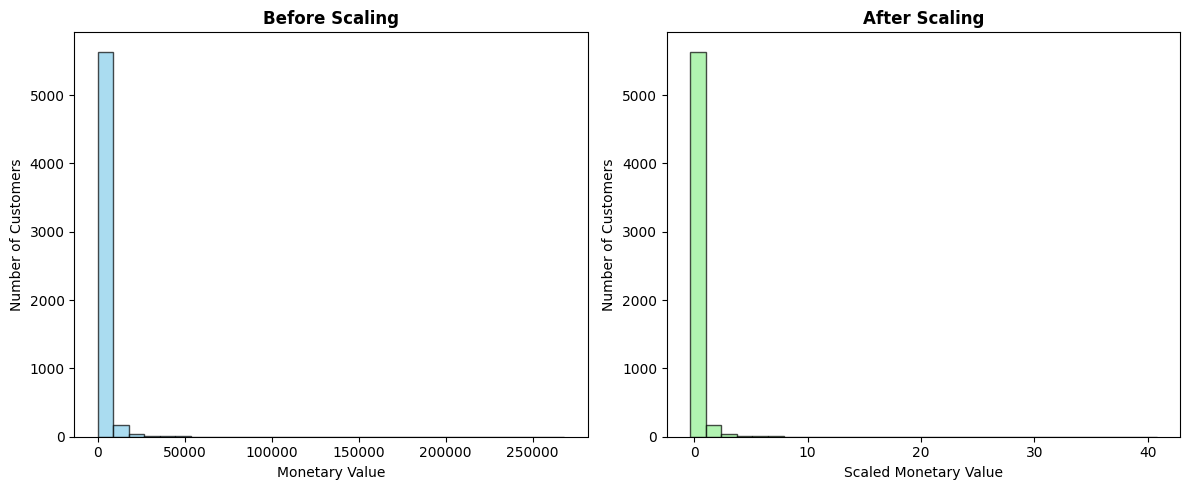

Saved: ..\results\eda_visualization\IT24100322_shahly_scaling_effect.png

=== SCALING SUMMARY ===
Input data: 5881 customers
Transformation applied: StandardScaler (mean=0, std=1)
Features scaled: R, F, M

Output saved: ..\results\outputs\05_rfm_scaled.csv
✅ Ready for clustering with standardized features!

Saved columns: ['Customer ID', 'R', 'F', 'M', 'R_scaled', 'F_scaled', 'M_scaled']


,Customer ID,R,F,M,R_scaled,F_scaled,M_scaled
0,12346,325,12,400.94,0.591999,0.439049,-0.276343
1,12347,2,8,5287.51,-0.949974,0.131635,0.472957
2,12348,75,5,1072.23,-0.601479,-0.098925,-0.173409


In [18]:
# EDA: Before and after scaling comparison
plt.figure(figsize=(12, 5))

# Before scaling
plt.subplot(1, 2, 1)
plt.hist(rfm["M"], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Before Scaling", fontweight='bold')
plt.xlabel("Monetary Value")
plt.ylabel("Number of Customers")

# After scaling
plt.subplot(1, 2, 2)
plt.hist(rfm["M_scaled"], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title("After Scaling", fontweight='bold')
plt.xlabel("Scaled Monetary Value")
plt.ylabel("Number of Customers")

save_fig("shahly_scaling_effect")

# Save the scaled RFM data
# Reset index to include CustomerID as a column
rfm_output = rfm.reset_index()

# Ensure CustomerID is the first column
cols = ["Customer ID"] + [c for c in rfm_output.columns if c != "Customer ID"]
rfm_output = rfm_output[cols]

# Save to CSV
output_path = OUTS / "05_rfm_scaled.csv"
rfm_output.to_csv(output_path, index=False)

print(f"\n=== SCALING SUMMARY ===")
print(f"Input data: {len(rfm)} customers")
print(f"Transformation applied: StandardScaler (mean=0, std=1)")
print(f"Features scaled: R, F, M")
print(f"\nOutput saved: {output_path}")
print(f"✅ Ready for clustering with standardized features!")

# Verify the saved file
check_df = pd.read_csv(output_path, nrows=3)
print(f"\nSaved columns: {list(check_df.columns)}")
check_df